# The Hacker Within Fall 2017 survey

by R. Stuart Geiger, freely dual licensed CC-BY 4.0, MIT license

# Importing and processing data

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing data and previewing

In [2]:
df = pd.read_csv("thwfall2017-survey.csv")
df = df[1:]

Oh no, these are some messy column names! Gotta clean them up, truncating the first 308 characters.

In [3]:
df.columns[0:3]

Index(['For each of the languages, areas, and topics, please check the boxes in each column if you: \n\n\n\twant something on this at THW (check as many as you want)\n\treally want something on this at THW (check no more than 5)\n\tknow something about this and could help teach (no obligation, check as many as you want) - R',
       'For each of the languages, areas, and topics, please check the boxes in each column if you: \n\n\n\twant something on this at THW (check as many as you want)\n\treally want something on this at THW (check no more than 5)\n\tknow something about this and could help teach (no obligation, check as many as you want) - Python',
       'For each of the languages, areas, and topics, please check the boxes in each column if you: \n\n\n\twant something on this at THW (check as many as you want)\n\treally want something on this at THW (check no more than 5)\n\tknow something about this and could help teach (no obligation, check as many as you want) - Julia'],
      

In [4]:
count = 0
for column in df.columns:
    if count < 43:
        df = df.rename(columns = {column:column[308:]})
        print(len(column), column[308:])
    count = count + 1

309 R
314 Python
313 Julia
315 Fortran
315 C / C++
310 Go
315 Haskell
312 Rust
321 SQL databases
323 noSQL databases
324 Machine Learning
321 Deep Learning
334 High Performance Computing
332 Containers (e.g. docker)
323 Cloud Computing
327 Visualization Tools
328 Statistical Analysis
340 Mapping and Geospatial Analaysis
324 Textual Analysis
322 Image Analysis
327 Timeseries Analysis
326 Parallelizing code
340 Profiling / performance analysis
321 Meshing Tools
323 Linux/UNIX/bash
314 GitHub
340 How open source projects are run
331 jekyll and GitHub pages
330 Reproducible Workflows
342 Open Science / Open Data platforms
320 Web Scraping
357 Publication Tools (e.g., markup languages, LaTeX)
348 Documentation (tools and best practices)
375 Hardware sensors / Internet of Things (e.g., arduino, raspberry pi)
340 Novel Architectures (e.g., GPUs)
323 Web Development
353 Software engineering (including unit testing)
313 Other
320 Other - Text
315 Other.1
322 Other - Text.1
315 Other.2
322 Other

In [5]:
topic_list = df.columns[0:37]
topic_list

Index(['R', 'Python', 'Julia', 'Fortran', 'C / C++', 'Go', 'Haskell', 'Rust',
       'SQL databases', 'noSQL databases', 'Machine Learning', 'Deep Learning',
       'High Performance Computing', 'Containers (e.g. docker)',
       'Cloud Computing', 'Visualization Tools', 'Statistical Analysis',
       'Mapping and Geospatial Analaysis', 'Textual Analysis',
       'Image Analysis', 'Timeseries Analysis', 'Parallelizing code',
       'Profiling / performance analysis', 'Meshing Tools', 'Linux/UNIX/bash',
       'GitHub', 'How open source projects are run', 'jekyll and GitHub pages',
       'Reproducible Workflows', 'Open Science / Open Data platforms',
       'Web Scraping', 'Publication Tools (e.g., markup languages, LaTeX)',
       'Documentation (tools and best practices)',
       'Hardware sensors / Internet of Things (e.g., arduino, raspberry pi)',
       'Novel Architectures (e.g., GPUs)', 'Web Development',
       'Software engineering (including unit testing)'],
      dtype='obje

Creating two dataframes: df_topics for interest/experience about topics and df_meta for questions about THW

In [6]:
df_topics = df[topic_list]

In [7]:
df_meta = df
df_meta = df[['Skill level', 'Personal experience', 'Presentation style']]

# Topic interest

Each topic (e.g. Python, R, GitHub) has one cell, with a list based on the items checked. 

* If someone clicked "I want this at THW", there will be a 1. 
* If someone clicked "I *really* want this at THW," there will be a 2. 
* If someone clicked "I know something about this..." there will be a 3. 

These are mutually independent -- if someone clicked all of them, the value would be "1, 2, 3" and so on.


Assumptions for calculating interest: If someone clicked that they just wanted a topic, add 1 to the topic's score. If someone clicked that they *really* wanted it, add 3 to the topic's score. If they clicked both, just add 3, not 4.

In [8]:
topic_interest = {}
topic_teaching = {}

for topic in df_topics:
    
    topic_interest[topic] = 0
    topic_teaching[topic] = 0

    for row in df_topics[topic]:
        
        # if row contains only value 1, increment interest dict by 1
        if str(row).find('1')>=0 and str(row).find('2')==-1:
            topic_interest[topic] += 1
        
        # if row contains value 2, increment interest dict by 3
        if str(row).find('2')>=0:
            topic_interest[topic] += 3
            
        if str(row).find('3')>=0:
            topic_teaching[topic] += 1       

## Results

In [9]:
topic_interest_df = pd.DataFrame.from_dict(topic_interest, orient="index")
topic_interest_df.sort_values([0], ascending=False)

,0
Statistical Analysis,44
Python,42
Machine Learning,40
Deep Learning,39
Visualization Tools,33
SQL databases,31
Profiling / performance analysis,28
Timeseries Analysis,28
Mapping and Geospatial Analaysis,28
Web Scraping,28


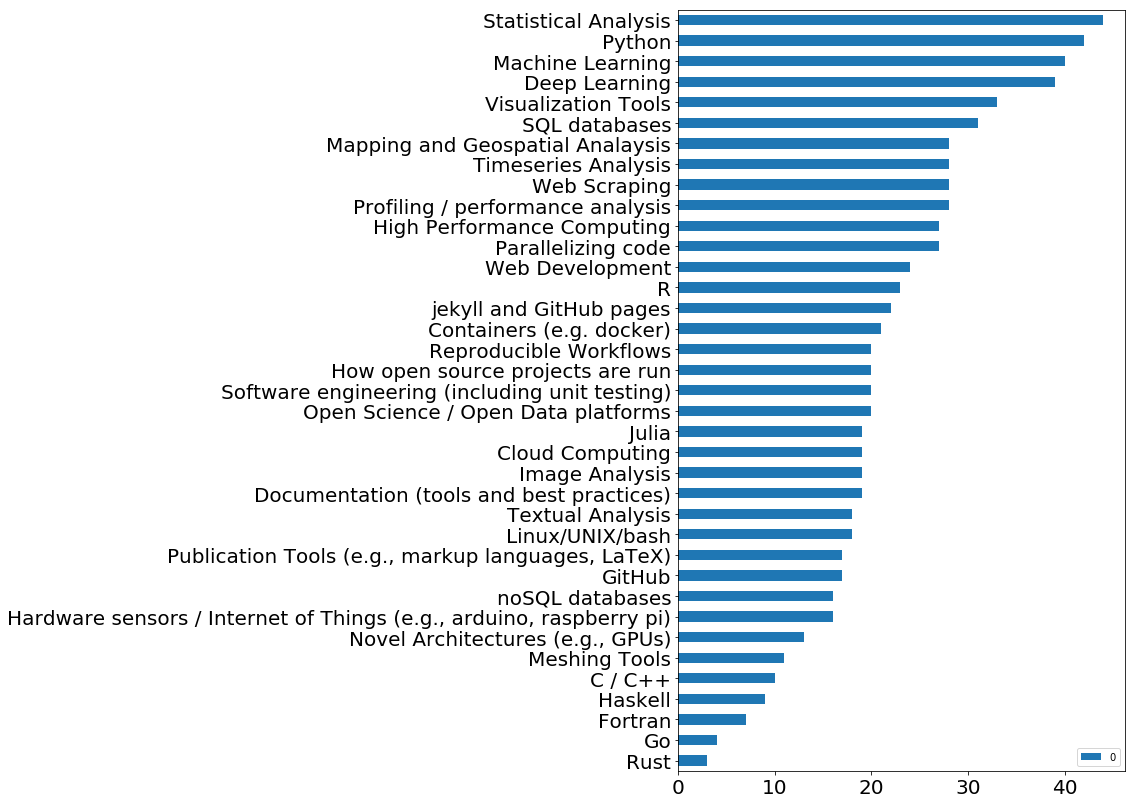

In [10]:
topic_interest_df = topic_interest_df.sort_values([0], ascending=True)
topic_interest_df.plot(figsize=[8,14], kind='barh', fontsize=20)

# Topic expertise

In [11]:
topic_teaching_df = pd.DataFrame.from_dict(topic_teaching, orient="index")
topic_teaching_df = topic_teaching_df[topic_teaching_df[0] != 0]
topic_teaching_df.sort_values([0], ascending=False)

,0
Python,9
GitHub,6
Linux/UNIX/bash,6
"Publication Tools (e.g., markup languages, LaTeX)",6
High Performance Computing,3
R,3
Mapping and Geospatial Analaysis,3
Parallelizing code,2
Open Science / Open Data platforms,2
Documentation (tools and best practices),2


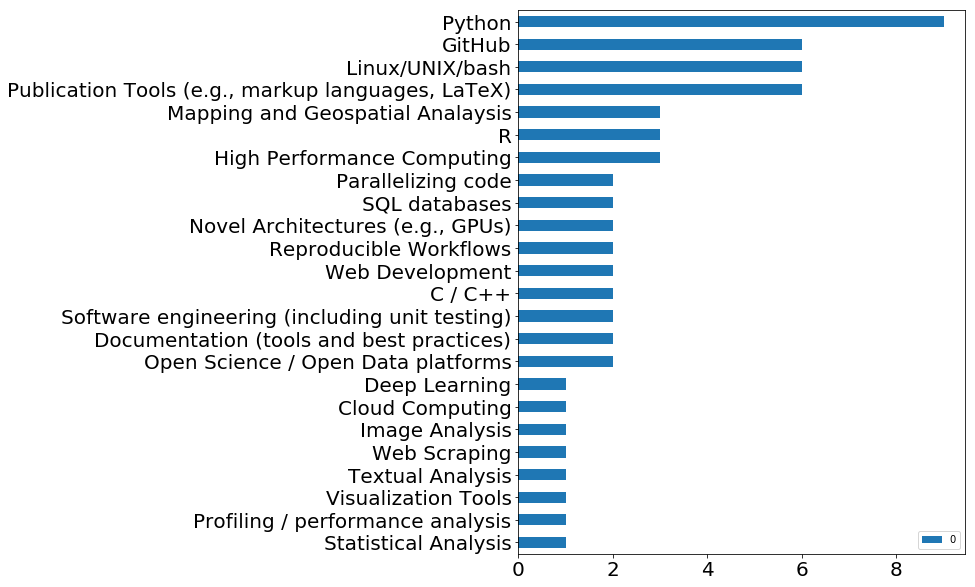

In [12]:
topic_teaching_df = topic_teaching_df.sort_values([0], ascending=True)
topic_teaching_df.plot(figsize=[8,10], kind='barh', fontsize=20)

# Meta questions about THW

In [13]:
df_meta = df_meta.dropna()
df_meta[0:4]

,Skill level,Personal experience,Presentation style
1,2,2,2
2,3,2,4
3,2,2,2
4,2,3,2


## Personal experience with scientific computing

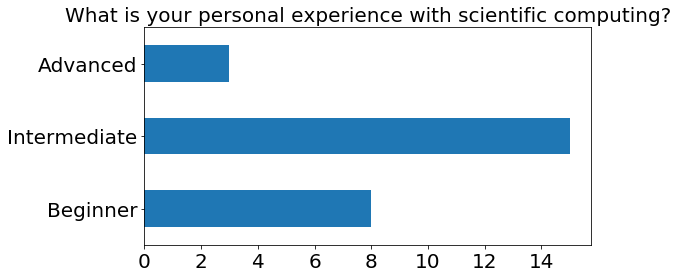

In [14]:
fig, ax = plt.subplots()
pe_df = df_meta['Personal experience'].value_counts(sort=False).sort_index(ascending=True)
pe_plot = pe_df.plot(kind='barh', fontsize=20, figsize=[8,4], ax=ax)
plt.title("What is your personal experience with scientific computing?", size=20)
ax.set_yticklabels(["Beginner", "Intermediate", "Advanced"])

## What skill level should we aim for?

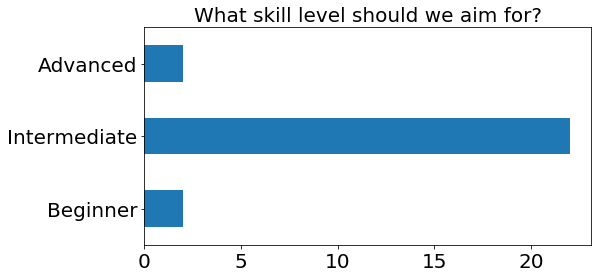

In [15]:
fig, ax = plt.subplots()
skill_df = df_meta['Skill level'].value_counts(sort=False).sort_index(ascending=True)
skill_plot = skill_df.plot(kind='barh', fontsize=20, figsize=[8,4], ax=ax)
plt.title("What skill level should we aim for?", size=20)
ax.set_yticklabels(["Beginner", "Intermediate", "Advanced"])

## What should our sessions look like?

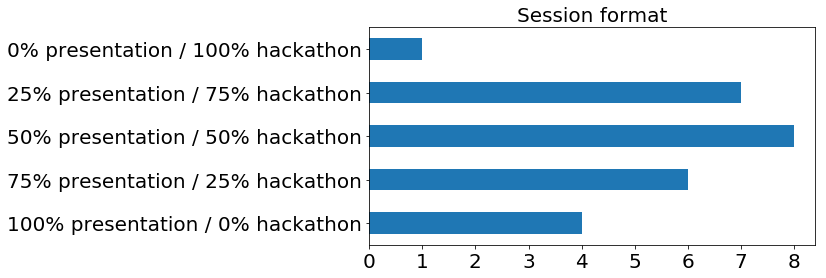

In [17]:
fig, ax = plt.subplots()
style_df = df_meta['Presentation style'].value_counts(sort=False).sort_index(ascending=True)
style_plot = style_df.plot(kind='barh', fontsize=20, figsize=[8,4], ax=ax)
plt.title("Session format", size=20)
ax.set_yticklabels(["100% presentation / 0% hackathon",
                    "75% presentation / 25% hackathon",
                    "50% presentation / 50% hackathon",
                    "25% presentation / 75% hackathon",
                    "0% presentation / 100% hackathon"])